# Patent Length Analysis Utilities

Reusable functions for analyzing and visualizing patent document length distributions.
Use these functions throughout the pipeline development to track how processing steps affect document lengths.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from typing import Optional, Tuple, Dict

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [9]:
def load_length_results(csv_path: str) -> pd.DataFrame:
    """
    Load patent length results from CSV file.
    
    Args:
        csv_path: Path to the CSV file with columns [patent_id, filename, character_count, success]
        
    Returns:
        DataFrame with patent length data
    """
    df = pd.read_csv(csv_path)
    
    # Filter out failed processing and unknown IDs
    df_clean = df[(df['success'] == True) & (df['patent_id'] != 'UNKNOWN')].copy()
    
    print(f"Loaded {len(df)} total records")
    print(f"Successful processing: {len(df_clean)} records ({len(df_clean)/len(df)*100:.1f}%)")
    print(f"Failed processing: {len(df[df['success'] == False])} records")
    print(f"Missing patent IDs: {len(df[df['patent_id'] == 'UNKNOWN'])} records")
    
    return df_clean

In [10]:
def get_length_statistics(df: pd.DataFrame, column: str = 'character_count') -> Dict:
    """
    Calculate comprehensive statistics for patent document lengths.
    
    Args:
        df: DataFrame with patent data
        column: Column name containing length data
        
    Returns:
        Dictionary with statistics
    """
    lengths = df[column]
    
    stats = {
        'count': len(lengths),
        'mean': lengths.mean(),
        'median': lengths.median(),
        'std': lengths.std(),
        'min': lengths.min(),
        'max': lengths.max(),
        'q25': lengths.quantile(0.25),
        'q75': lengths.quantile(0.75),
        'q90': lengths.quantile(0.90),
        'q95': lengths.quantile(0.95),
        'q99': lengths.quantile(0.99)
    }
    
    return stats

In [11]:
def print_length_summary(df: pd.DataFrame, column: str = 'character_count', title: str = "Patent Length Summary"):
    """
    Print a formatted summary of patent document length statistics.
    
    Args:
        df: DataFrame with patent data
        column: Column name containing length data
        title: Title for the summary
    """
    stats = get_length_statistics(df, column)
    
    print("=" * 60)
    print(title.upper())
    print("=" * 60)
    print(f"Count:           {stats['count']:,}")
    print(f"Mean:            {stats['mean']:,.0f} characters")
    print(f"Median:          {stats['median']:,.0f} characters")
    print(f"Std Dev:         {stats['std']:,.0f} characters")
    print(f"Min:             {stats['min']:,.0f} characters")
    print(f"Max:             {stats['max']:,.0f} characters")
    print(f"25th percentile: {stats['q25']:,.0f} characters")
    print(f"75th percentile: {stats['q75']:,.0f} characters")
    print(f"90th percentile: {stats['q90']:,.0f} characters")
    print(f"95th percentile: {stats['q95']:,.0f} characters")
    print(f"99th percentile: {stats['q99']:,.0f} characters")
    print("=" * 60)

In [12]:
def plot_length_histogram(
    df: pd.DataFrame, 
    column: str = 'character_count',
    title: str = "Patent Document Length Distribution",
    bins: int = 50,
    figsize: Tuple[int, int] = (12, 8),
    log_scale: bool = False,
    show_stats: bool = True
) -> plt.Figure:
    """
    Create a comprehensive histogram of patent document lengths.
    
    Args:
        df: DataFrame with patent data
        column: Column name containing length data
        title: Plot title
        bins: Number of histogram bins
        figsize: Figure size tuple
        log_scale: Use log scale for y-axis
        show_stats: Show statistics on the plot
        
    Returns:
        Matplotlib figure object
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize)
    
    lengths = df[column]
    stats = get_length_statistics(df, column)
    
    # Main histogram
    ax1.hist(lengths, bins=bins, alpha=0.7, edgecolor='black', linewidth=0.5)
    ax1.axvline(stats['mean'], color='red', linestyle='--', linewidth=2, label=f'Mean: {stats["mean"]:,.0f}')
    ax1.axvline(stats['median'], color='green', linestyle='--', linewidth=2, label=f'Median: {stats["median"]:,.0f}')
    
    ax1.set_xlabel('Character Count')
    ax1.set_ylabel('Frequency')
    ax1.set_title(title)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    if log_scale:
        ax1.set_yscale('log')
    
    # Box plot for outlier visualization
    ax2.boxplot(lengths, vert=False, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', alpha=0.7))
    ax2.set_xlabel('Character Count')
    ax2.set_title('Box Plot (showing outliers)')
    ax2.grid(True, alpha=0.3)
    
    # Add statistics text box
    if show_stats:
        stats_text = f"""Count: {stats['count']:,}
Mean: {stats['mean']:,.0f}
Median: {stats['median']:,.0f}
Std: {stats['std']:,.0f}
Min: {stats['min']:,.0f}
Max: {stats['max']:,.0f}"""
        
        ax1.text(0.72, 0.98, stats_text, transform=ax1.transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    return fig

In [13]:
def compare_length_distributions(
    df_before: pd.DataFrame,
    df_after: pd.DataFrame,
    column: str = 'character_count',
    before_label: str = "Before Processing",
    after_label: str = "After Processing",
    figsize: Tuple[int, int] = (15, 10)
) -> plt.Figure:
    """
    Compare length distributions before and after processing.
    
    Args:
        df_before: DataFrame with data before processing
        df_after: DataFrame with data after processing
        column: Column name containing length data
        before_label: Label for before data
        after_label: Label for after data
        figsize: Figure size tuple
        
    Returns:
        Matplotlib figure object
    """
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    lengths_before = df_before[column]
    lengths_after = df_after[column]
    
    stats_before = get_length_statistics(df_before, column)
    stats_after = get_length_statistics(df_after, column)
    
    # Overlapping histograms
    ax1 = axes[0, 0]
    ax1.hist(lengths_before, bins=50, alpha=0.6, label=before_label, color='blue')
    ax1.hist(lengths_after, bins=50, alpha=0.6, label=after_label, color='orange')
    ax1.set_xlabel('Character Count')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Distribution Comparison')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Box plots side by side
    ax2 = axes[0, 1]
    box_data = [lengths_before, lengths_after]
    box_labels = [before_label, after_label]
    bp = ax2.boxplot(box_data, labels=box_labels, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][1].set_facecolor('lightcoral')
    ax2.set_ylabel('Character Count')
    ax2.set_title('Box Plot Comparison')
    ax2.grid(True, alpha=0.3)
    
    # Compression ratio analysis (if applicable)
    ax3 = axes[1, 0]
    if len(df_before) == len(df_after):  # Same documents processed
        compression_ratios = lengths_before / lengths_after
        ax3.hist(compression_ratios, bins=30, alpha=0.7, color='green')
        ax3.axvline(compression_ratios.mean(), color='red', linestyle='--', 
                   label=f'Mean Ratio: {compression_ratios.mean():.2f}x')
        ax3.set_xlabel('Compression Ratio (Before/After)')
        ax3.set_ylabel('Frequency')
        ax3.set_title('Compression Ratio Distribution')
        ax3.legend()
        ax3.grid(True, alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Different number of documents\nCannot calculate compression ratios', 
                ha='center', va='center', transform=ax3.transAxes, fontsize=12)
        ax3.set_title('Compression Analysis')
    
    # Statistics comparison table
    ax4 = axes[1, 1]
    ax4.axis('tight')
    ax4.axis('off')
    
    comparison_data = [
        ['Metric', before_label, after_label, 'Change'],
        ['Count', f"{stats_before['count']:,}", f"{stats_after['count']:,}", 
         f"{stats_after['count'] - stats_before['count']:,}"],
        ['Mean', f"{stats_before['mean']:,.0f}", f"{stats_after['mean']:,.0f}", 
         f"{(stats_after['mean'] - stats_before['mean']) / stats_before['mean'] * 100:+.1f}%"],
        ['Median', f"{stats_before['median']:,.0f}", f"{stats_after['median']:,.0f}", 
         f"{(stats_after['median'] - stats_before['median']) / stats_before['median'] * 100:+.1f}%"],
        ['Std Dev', f"{stats_before['std']:,.0f}", f"{stats_after['std']:,.0f}", 
         f"{(stats_after['std'] - stats_before['std']) / stats_before['std'] * 100:+.1f}%"],
        ['Min', f"{stats_before['min']:,.0f}", f"{stats_after['min']:,.0f}", 
         f"{stats_after['min'] - stats_before['min']:+,.0f}"],
        ['Max', f"{stats_before['max']:,.0f}", f"{stats_after['max']:,.0f}", 
         f"{stats_after['max'] - stats_before['max']:+,.0f}"]
    ]
    
    table = ax4.table(cellText=comparison_data[1:], colLabels=comparison_data[0],
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    ax4.set_title('Statistics Comparison', pad=20)
    
    plt.tight_layout()
    return fig

In [14]:
def analyze_length_data(csv_path: str, title: str = "Patent Length Analysis"):
    """
    Complete analysis workflow: load data, print summary, and create plots.
    
    Args:
        csv_path: Path to CSV file with length data
        title: Title for the analysis
        
    Returns:
        DataFrame with the loaded data
    """
    # Load data
    df = load_length_results(csv_path)
    
    # Print summary
    print_length_summary(df, title=title)
    
    # Create plots
    fig = plot_length_histogram(df, title=f"{title} - Distribution")
    plt.show()
    
    return df

## Usage Examples

Here are examples of how to use these functions:

In [15]:
# Example 1: Analyze raw character counts
# df_raw = analyze_length_data('raw_count_results.csv', 'Raw Patent XML Length')

In [16]:
# Example 2: Compare before and after processing
# df_before = load_length_results('step1_results.csv')
# df_after = load_length_results('step2_results.csv')
# fig = compare_length_distributions(df_before, df_after, 
#                                   before_label='After XML Cleaning',
#                                   after_label='After Boilerplate Removal')
# plt.show()

In [17]:
# Example 3: Custom histogram with log scale for very skewed data
# df = load_length_results('results.csv')
# fig = plot_length_histogram(df, log_scale=True, bins=100, 
#                            title='Patent Length Distribution (Log Scale)')
# plt.show()

## Pipeline Development Workflow

Use this notebook throughout your pipeline development:

1. **After each processing step**, save results to CSV with patent_id and length columns
2. **Use `analyze_length_data()`** to quickly see the impact of your processing step
3. **Use `compare_length_distributions()`** to compare before/after results
4. **Track compression ratios** to ensure you're meeting your 2-5x target
5. **Monitor for outliers** that might indicate processing errors

The functions handle missing IDs, failed processing, and provide comprehensive statistics to help you understand how each pipeline step affects the patent document lengths.

# Raw length - step 0

Loaded 405482 total records
Successful processing: 405482 records (100.0%)
Failed processing: 0 records
Missing patent IDs: 0 records
RAW PATENT XML LENGTH
Count:           405,482
Mean:            101,980 characters
Median:          80,910 characters
Std Dev:         91,970 characters
Min:             11,051 characters
Max:             6,906,829 characters
25th percentile: 57,986 characters
75th percentile: 116,682 characters
90th percentile: 170,915 characters
95th percentile: 225,365 characters
99th percentile: 438,363 characters


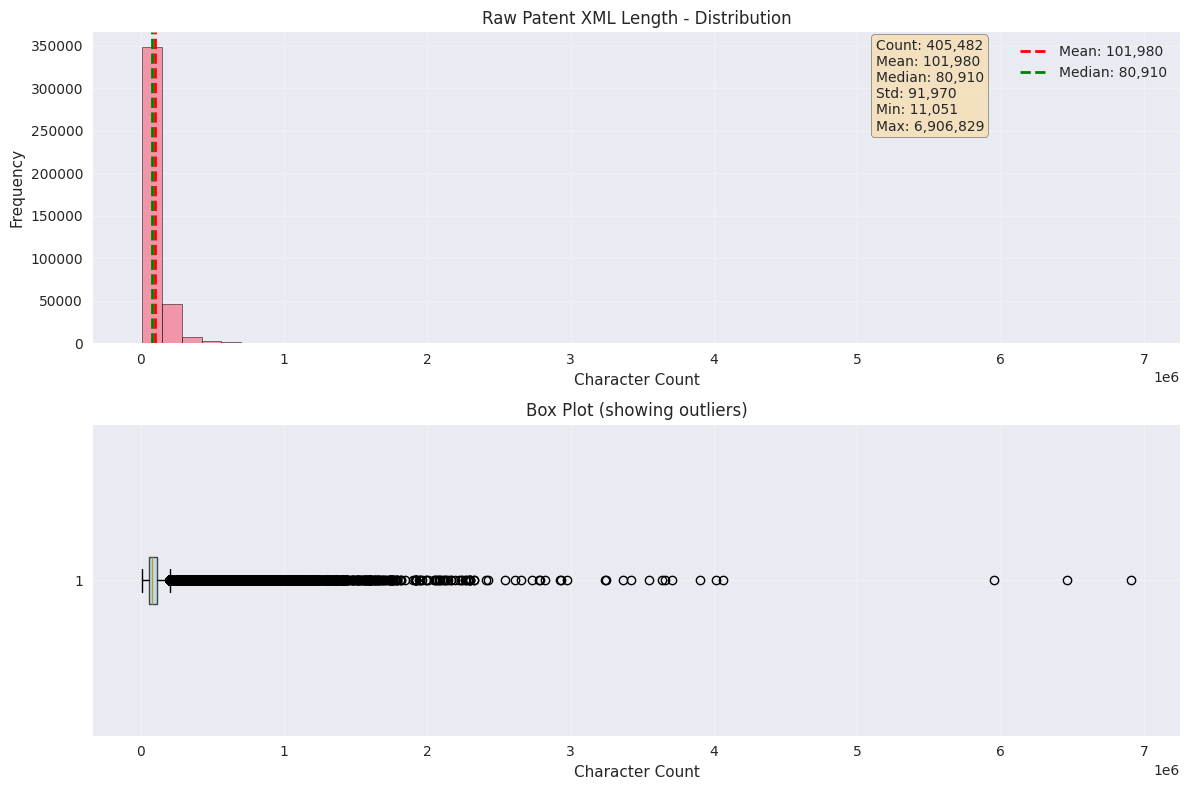

In [18]:
df_raw = analyze_length_data('raw_count_results.csv', 'Raw Patent XML Length')